In [1]:
from tinyphysics import TinyPhysicsModel, TinyPhysicsSimulator, CONTROL_START_IDX
from controllers import pid, pidf
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

ACC_G = 9.81

sns.set_theme()


/home/risak/controls_challenge/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_rollout(sim):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(sim.target_lataccel_history, label="Target Lateral Acceleration", alpha=0.5)
  ax.plot(sim.current_lataccel_history, label="Actual Lateral Acceleration", alpha=0.5)
  ax.legend()
  ax.set_xlabel("Step")
  ax.set_ylabel("Lateral Acceleration")
  ax.set_title("Rollout")
  plt.show()

In [7]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=True)
controller_pid = pid.Controller()
controller_pidf = pidf.Controller(0, 0, 0, 1)

In [8]:
sim = TinyPhysicsSimulator(model, "./data/00392.csv", controller=controller_pidf, debug=False)
sim.rollout()

{'lataccel_cost': 6.7511731869387495,
 'jerk_cost': 28.36683626729879,
 'total_cost': 365.92549561423624}

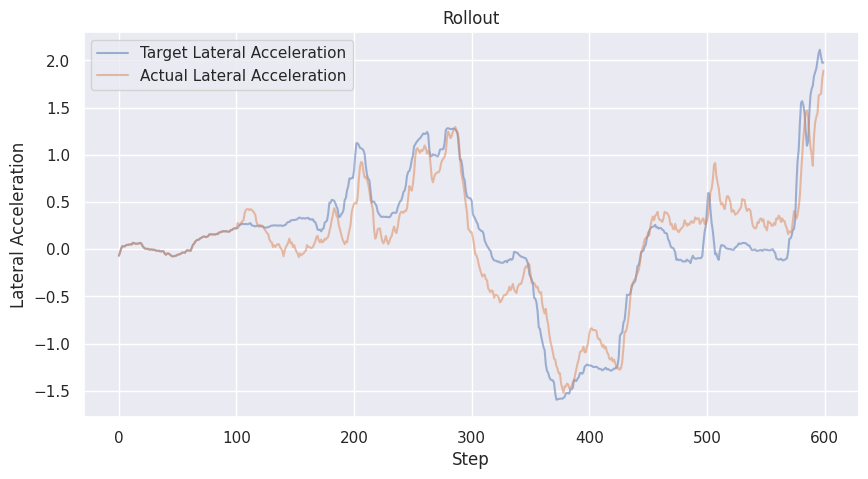

In [9]:
plot_rollout(sim)